In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv(r"C:\Users\engah\OneDrive\Desktop\Studymart\knn Assignment\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['Gender_encoded'] = le.fit_transform(df['Gender'])

In [50]:
df.head()

,Gender,Height,Weight,Gender_encoded
0,Male,73.847017,241.893563,1
1,Male,68.781904,162.310473,1
2,Male,74.110105,212.740856,1
3,Male,71.730978,220.042470,1
4,Male,69.881796,206.349801,1


In [51]:
df.tail()

,Gender,Height,Weight,Gender_encoded
8550,Female,60.483946,110.565497,0
8551,Female,63.423372,129.921671,0
8552,Female,65.584057,155.942671,0
8553,Female,67.429971,151.678405,0
8554,Female,60.921791,131.253738,0


# Go Ahead

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          8555 non-null   object 
 1   Height          8555 non-null   float64
 2   Weight          8555 non-null   float64
 3   Gender_encoded  8555 non-null   int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 234.1+ KB
None


In [54]:
print(df.describe())

            Height       Weight  Gender_encoded
count  8555.000000  8555.000000     8555.000000
mean     66.809925   165.632735        0.584454
std       3.851454    32.043922        0.492845
min      54.616858    65.780000        0.000000
25%      63.957684   139.876803        0.000000
50%      66.985923   168.521567        1.000000
75%      69.604427   190.666305        1.000000
max      80.450000   269.989698        1.000000


In [55]:
print(df.isnull().sum())

Gender            0
Height            0
Weight            0
Gender_encoded    0
dtype: int64


In [56]:
print(df['Gender'].value_counts())


Gender
Male      5000
Female    3555
Name: count, dtype: int64


# EDA

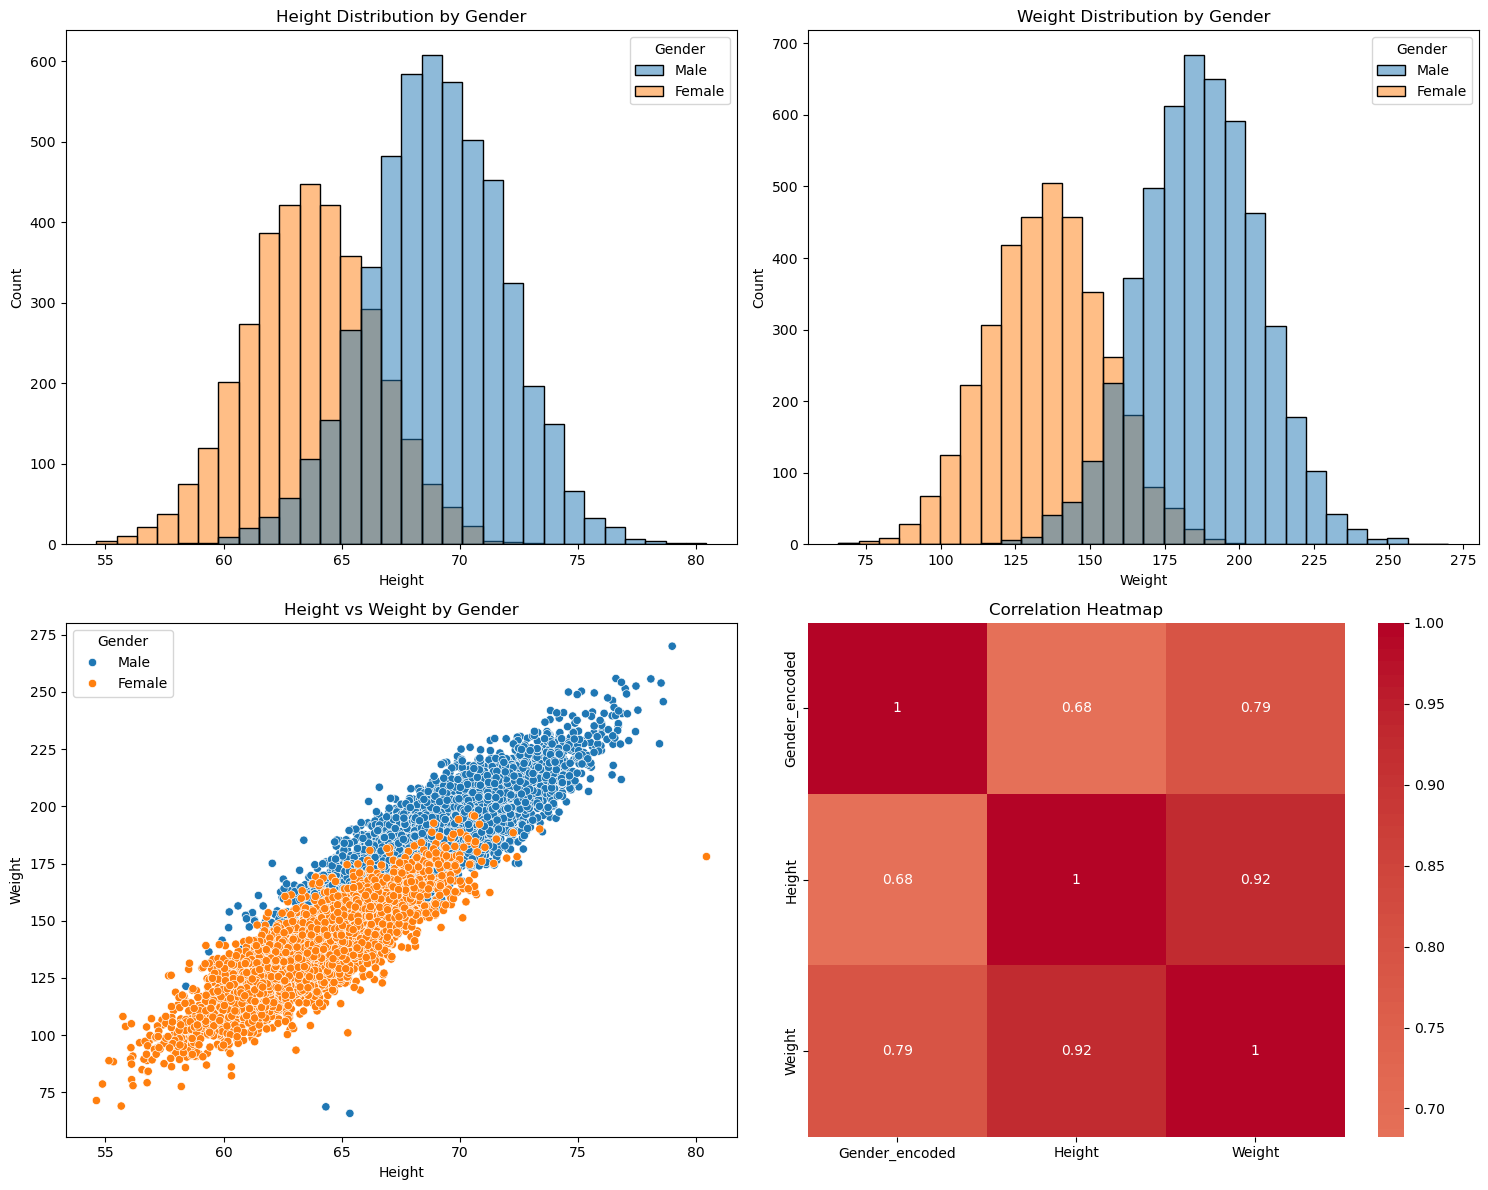

In [58]:
# Create visualizations
# ==========================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Height distribution by gender
sns.histplot(data=df, x='Height', hue='Gender', bins=30, ax=axes[0,0])
axes[0,0].set_title('Height Distribution by Gender')

# Weight distribution by gender
sns.histplot(data=df, x='Weight', hue='Gender', bins=30, ax=axes[0,1])
axes[0,1].set_title('Weight Distribution by Gender')

# Scatter plot: Height vs Weight colored by Gender
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', ax=axes[1,0])
axes[1,0].set_title('Height vs Weight by Gender')

# Correlation heatmap
correlation_matrix = df[['Gender_encoded', 'Height', 'Weight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Least Squared Linear Regression

In [84]:
# Prepare data for regression (predicting Weight from Gender and Height)
X_reg = df[['Gender_encoded', 'Height']]
y_reg = df['Weight']

In [86]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)


In [88]:
# Apply Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)


LinearRegression()

In [92]:
# Make predictions
y_train_pred_lr = lr_model.predict(X_train_reg)
y_test_pred_lr = lr_model.predict(X_test_reg)


In [94]:
# Calculate R² scores (training and testing accuracy)
train_r2_lr = lr_model.score(X_train_reg, y_train_reg)
test_r2_lr = lr_model.score(X_test_reg, y_test_reg)


In [96]:
# Calculate MSE
train_mse_lr = mean_squared_error(y_train_reg, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test_reg, y_test_pred_lr)


In [98]:
print("\nLinear Regression Results:")
print(f"Training R² Score: {train_r2_lr:.4f}")
print(f"Testing R² Score: {test_r2_lr:.4f}")
print(f"Training MSE: {train_mse_lr:.4f}")
print(f"Testing MSE: {test_mse_lr:.4f}")



Linear Regression Results:
Training R² Score: 0.8974
Testing R² Score: 0.9059
Training MSE: 105.2381
Testing MSE: 96.8373


In [100]:
# Display coefficients
print(f"\nModel Coefficients:")
print(f"Intercept: {lr_model.intercept_:.4f}")
print(f"Gender coefficient: {lr_model.coef_[0]:.4f}")
print(f"Height coefficient: {lr_model.coef_[1]:.4f}")



Model Coefficients:
Intercept: -243.7931
Gender coefficient: 19.5415
Height coefficient: 5.9562


# Regression Problem

In [102]:
# Apply KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)


KNeighborsRegressor()

In [104]:
# Make predictions
y_train_pred_knn = knn_reg.predict(X_train_reg)
y_test_pred_knn = knn_reg.predict(X_test_reg)


In [106]:
# Calculate R² scores
train_r2_knn = knn_reg.score(X_train_reg, y_train_reg)
test_r2_knn = knn_reg.score(X_test_reg, y_test_reg)

In [108]:
# Calculate MSE
train_mse_knn = mean_squared_error(y_train_reg, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test_reg, y_test_pred_knn)


In [110]:
print("KNN Regressor Results:")
print(f"Training R² Score: {train_r2_knn:.4f}")
print(f"Testing R² Score: {test_r2_knn:.4f}")
print(f"Training MSE: {train_mse_knn:.4f}")
print(f"Testing MSE: {test_mse_knn:.4f}")


KNN Regressor Results:
Training R² Score: 0.9172
Testing R² Score: 0.8821
Training MSE: 84.8972
Testing MSE: 121.3353


# Classification Problem

In [112]:
# Prepare data for classification (predicting Gender from Height and Weight)
X_clf = df[['Height', 'Weight']]
y_clf = df['Gender_encoded']

In [114]:
# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

In [116]:
# Apply KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)


KNeighborsClassifier()

In [118]:
# Make predictions
y_train_pred_clf = knn_clf.predict(X_train_clf)
y_test_pred_clf = knn_clf.predict(X_test_clf)


In [120]:
# Calculate accuracy
train_acc_knn_clf = accuracy_score(y_train_clf, y_train_pred_clf)
test_acc_knn_clf = accuracy_score(y_test_clf, y_test_pred_clf)


In [122]:
print("KNN Classifier Results:")
print(f"Training Accuracy: {train_acc_knn_clf:.4f}")
print(f"Testing Accuracy: {test_acc_knn_clf:.4f}")


KNN Classifier Results:
Training Accuracy: 0.9292
Testing Accuracy: 0.9131


In [124]:
#Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)

LogisticRegression()

In [126]:
y_train_pred_log = log_reg.predict(X_train_clf)
y_test_pred_log = log_reg.predict(X_test_clf)


In [128]:
train_acc_log = accuracy_score(y_train_clf, y_train_pred_log)
test_acc_log = accuracy_score(y_test_clf, y_test_pred_log)


In [130]:
print("\nLogistic Regression Results:")
print(f"Training Accuracy: {train_acc_log:.4f}")
print(f"Testing Accuracy: {test_acc_log:.4f}")


Logistic Regression Results:
Training Accuracy: 0.9173
Testing Accuracy: 0.9186


# Comparison of Linear Rgeression and KNN Regressor

In [132]:
# Create comparison table
regression_comparison = pd.DataFrame({
    'Metric': ['Training R²', 'Testing R²', 'Training MSE', 'Testing MSE'],
    'Linear Regression': [train_r2_lr, test_r2_lr, train_mse_lr, test_mse_lr],
    'KNN Regressor': [train_r2_knn, test_r2_knn, train_mse_knn, test_mse_knn]
})

print(regression_comparison)

         Metric  Linear Regression  KNN Regressor
0   Training R²           0.897379       0.917214
1    Testing R²           0.905911       0.882109
2  Training MSE         105.238062      84.897200
3   Testing MSE          96.837344     121.335283


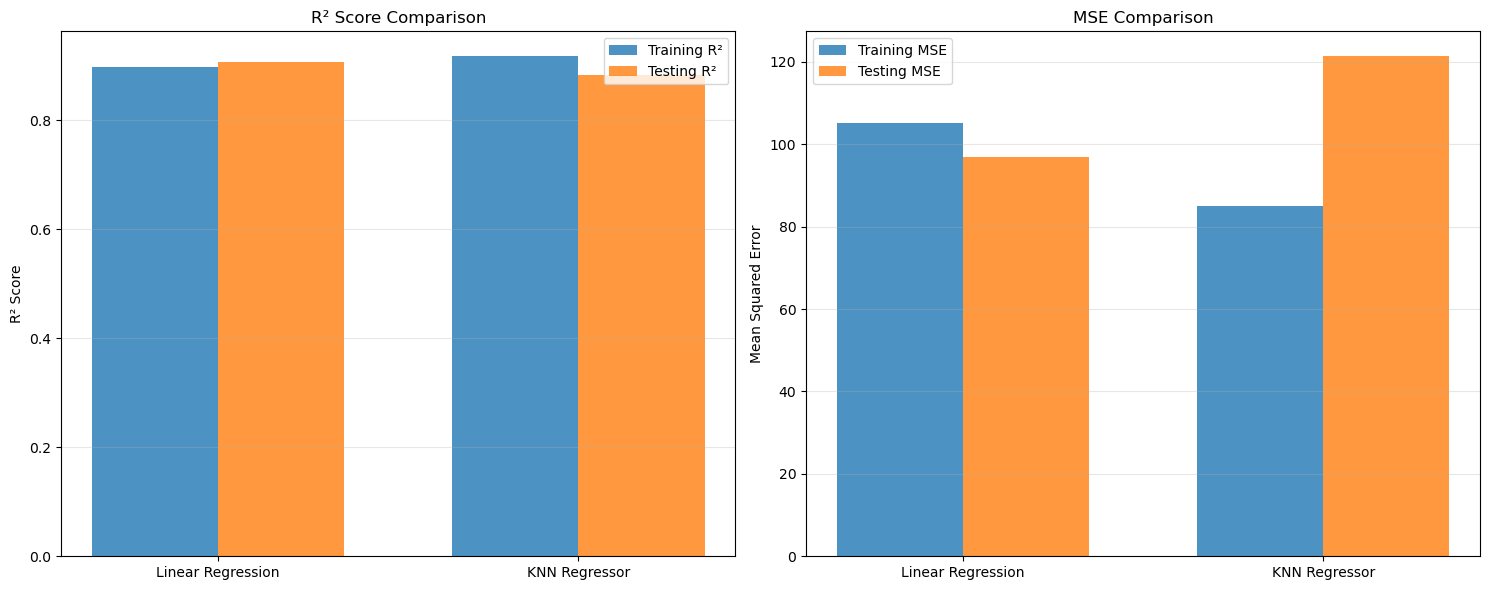

In [134]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R² Score comparison
models = ['Linear Regression', 'KNN Regressor']
train_scores = [train_r2_lr, train_r2_knn]
test_scores = [test_r2_lr, test_r2_knn]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Training R²', alpha=0.8)
axes[0].bar(x + width/2, test_scores, width, label='Testing R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# MSE comparison
train_mse = [train_mse_lr, train_mse_knn]
test_mse = [test_mse_lr, test_mse_knn]

axes[1].bar(x - width/2, train_mse, width, label='Training MSE', alpha=0.8)
axes[1].bar(x + width/2, test_mse, width, label='Testing MSE', alpha=0.8)
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('MSE Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# Comparison of Logistic Rgeression and KNN Classifier

In [136]:
# Create comparison table
classification_comparison = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Testing Accuracy'],
    'Logistic Regression': [train_acc_log, test_acc_log],
    'KNN Classifier': [train_acc_knn_clf, test_acc_knn_clf]
})

print(classification_comparison)


              Metric  Logistic Regression  KNN Classifier
0  Training Accuracy             0.917335        0.929192
1   Testing Accuracy             0.918582        0.913128


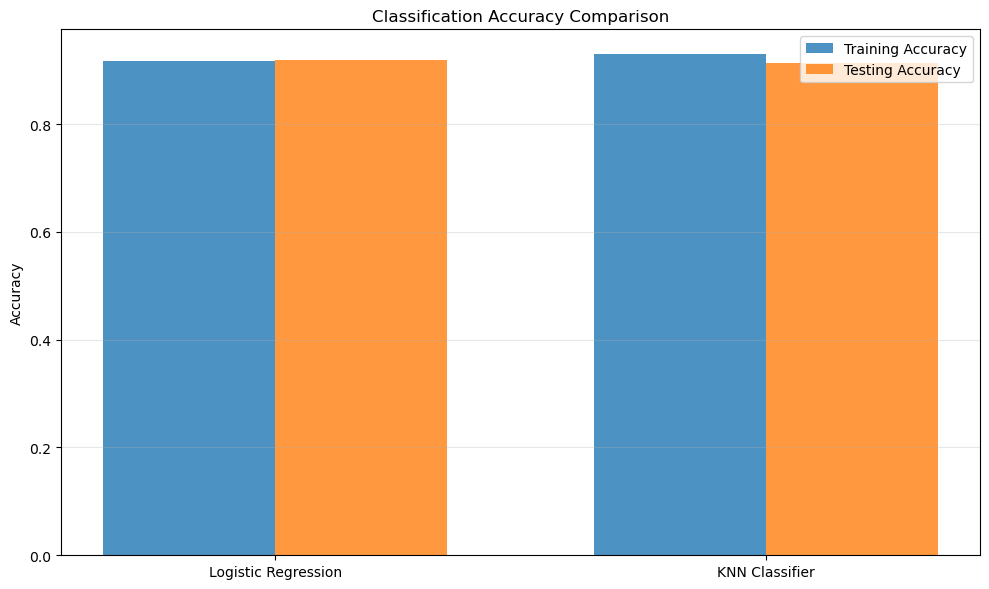

In [138]:
# Visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

models = ['Logistic Regression', 'KNN Classifier']
train_acc = [train_acc_log, train_acc_knn_clf]
test_acc = [test_acc_log, test_acc_knn_clf]

x = np.arange(len(models))
width = 0.35

ax.bar(x - width/2, train_acc, width, label='Training Accuracy', alpha=0.8)
ax.bar(x + width/2, test_acc, width, label='Testing Accuracy', alpha=0.8)
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
